Image processing is extensively used in fast growing markets like facial recognition and autonomous vehicles. At the same time Quantum Image Processing is an emerging field of Quantum Information Science that holds the promise of considerable speed-up for specific but commonly used operations like edge detection [3], [4]. For example, Zhang et al. proposed in 2014 a novel quantum image edge extraction algorithm (QSobel) based on the Flexible Representation of Quantum Images (FRQI) representation and the classical edge extraction algorithm Sobel. QSobel can extract edges in the computational complexity of $O(n^{2})$ for a FRQI quantum image with a size of $2^{n} × 2^{n}$, which is a significant and exponential speedup compared with existing edge extraction algorithms [3]

In this chapter we will cover two methods of encoding images in quantum states, the Flexible Representation of Quantum Images (FRQI) and the Novel Enhanced Quantum Representation (NEQR). Once our image is encoded in these states, we can then process them using other quantum algorithms such as the QSobel [3] edge extraction algorithm, but we will only cover encoding in this page.


# Flexible Representation of Quantum Images (FRQI)

The goal of the Flexible Representation of Quantum Images (FRQI) [1] is to provide a quantum representation of images that allows an efficient encoding of the classical data into a quantum state and the subsequent use of operators for image processing operations.
In this case, encoding the classical image into a quantum state requires a polynomial number of simple gates [2].

## 1. The FRQI State

The quantum state representing the image is:

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
\ket{I(\theta)}=\frac{1}{2^{n} }\sum_{i=0}^{2^{2n}-1}\left(\cos \theta_{i}\ket{0}+\sin\theta_{i}\ket{1}\right)\otimes\ket{i}
\label{eq:FRQI_state} \tag{1.1}
$$

$$
 \theta_{i}\in\left[ 0,\frac{\pi}{2}\right], i = 0,1,\cdots,2^{2n}-1
 \label{eq:FRQI_angle} \tag{1.2}
$$

The FRQI state is a normalized state as from equation $\eqref{eq:FRQI_state}$ we see that $\left\|I(\theta)\right\|=1$
and is made of two parts:

* color information encoding: $\cos\theta_{i}\ket{0}+\sin\theta_{i}\ket{1}$ 
* associated pixel position encoding: $\ket{i}$


A simple example for a $2\times2$ image is given below, with corresponding $\theta$ angles (color encoding) and associated kets (position encoding) :

$$
\begin{array}{|c|c|}
\hline
\theta_{0},\ket{00} & \theta_{1},\ket{01}  \\
\hline
\theta_{2},\ket{10} & \theta_{3},\ket{11} \\
\hline
\end{array}
$$

And the equivalent quantum state is

$$
\begin{aligned}
\ket{I}=\frac{1}{2}[ \; & \phantom{+} \left(\cos\theta_{0}\ket{0}+\sin\theta_{0}\ket{1} \right)\otimes\ket{00}&\\
& + \left(\cos\theta_{1}\ket{0}+\sin\theta_{1}\ket{1} \right)\otimes\ket{01} \\
& + \left(\cos\theta_{2}\ket{0}+\sin\theta_{2}\ket{1} \right)\otimes\ket{10}\\
& + \left(\cos\theta_{3}\ket{0}+\sin\theta_{3}\ket{1} \right)\otimes\ket{11} \;]
\end{aligned}
\label{eq:22state} \tag{1.3}
$$

## 2. Building the FRQI State: A Two Step Process

Going from an initialized state $\ket{0}^{\otimes2n+1}$ to the FRQI state specified in $\eqref{eq:FRQI_state}$ is a two steps process and we first need to put the system in full superposition, except for the last qubit which we will use to encode the color. $H^{\otimes2n}$ being the tensor product of $2n$ Hadamard operations, our intermediate state is 

$$
\ket{H}=\frac{1}{2^{n} }\ket{0}\otimes\sum_{i=0}^{2^{2n}-1}\ket{i}=\mathcal{H}\left(\ket{0}^{\otimes2n+1}\right)
\label{eq:superpos} \tag{2.1}
$$

As demonstrated in [1] there exist a unitary transformation $\mathcal{P}=\mathcal{RH}$ transforming the initial state $\ket{0}^{\otimes2n+1}$ into the FRQI $I(\theta)$ state and  

$$
\mathcal{R}\ket{H}=\left(\prod_{i=0}^{2^{2n}-1}R_{i}\right)\ket{H}=\ket{I(\theta)}
\tag{2.2}
$$

The $R_{i}$ operations are controlled rotations matrices defined by:

$$
R_{i}=\left( I\otimes \sum^{2^{2n}-1}_{j=0,j\neq i}\ket{j}\bra{j}\right) + R_{y}\left(2\theta_{i}\right)\otimes\ket{i}\bra{i} \tag{2.3}
$$

Where $R_{y}(2\theta_{i})$ are the standard rotation matrices:

$$
R_{y}(2\theta_{i})=
\begin{pmatrix}
\cos\theta_{i} & -\sin\theta_{i}\\
\sin\theta_{i} & \cos\theta_{i} 
\end{pmatrix} \tag{2.4}
$$

The controlled rotations can be implemented via the generalized $C^{2n}\left( R_{y}(2\theta_{i}) \right) $, which can be broken down into standard rotations and $CNOT$ gates.
For instance if we take the case for $n=1$, which means we have $4$ pixels (i.e. a $2\times2$ image), we do have the following equivalence, which can then be implemented easily.

![](images/circ_eq.png "Circuit Equivalence") 

Note that we still need to take care of the increment in the pixel location, this is done via the $X$ gates.

## 3.  Implementation and Measurement : 2×2 Image with Greyscale Values

Barriers are used for added clarity on the different blocks associated with individual pixels.
We also use greyscale images (i.e. the L component of a LRGB image), which means only one value is of interest for the color encoding: the intensity. In other words, all angles $\theta_{i}$ equal to $0$ means that all the pixels are black, if all $\theta_{i}$ values are equal to $\pi/2$ then all the pixels are white, and so on. The values of interest are $0, \pi/4 \; and \; \pi/2$.

### 3.1 Example 1 : $\theta_{i}=0 \;, \; \forall i$ - all pixels at minimum intensity



In [4]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
# Loading your IBMQ account(s)
provider = IBMQ.load_account()

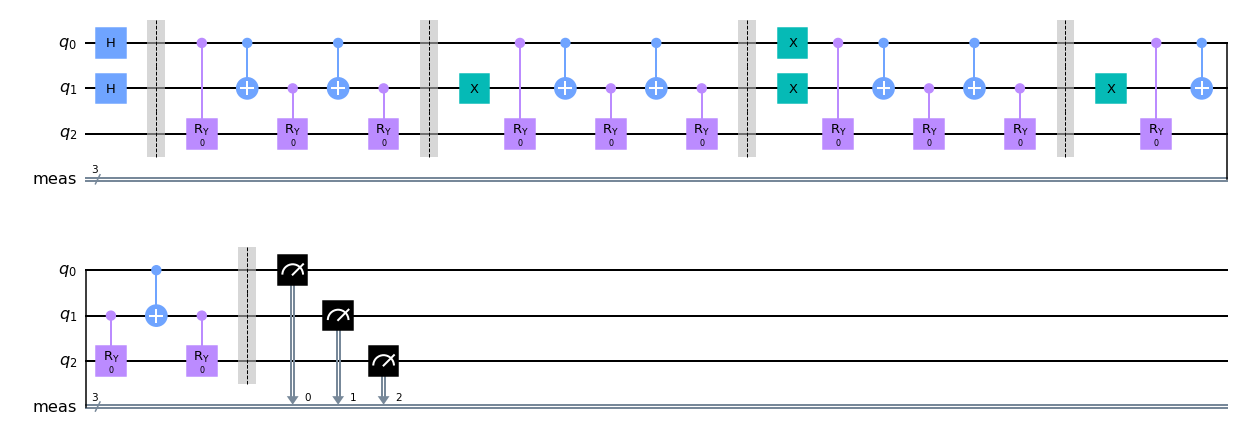

In [15]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

#### 3.1.1 Measurement and Image Retrieval


We can see from $\eqref{eq:22state}$ that all the terms associated with the state $\ket{1}$ in the color encoding part of the FRQI state will vanish because of the value of $\theta$ so we do expect to see only $4$ equiprobable states.


{'000': 1016, '001': 1041, '010': 998, '011': 1041}


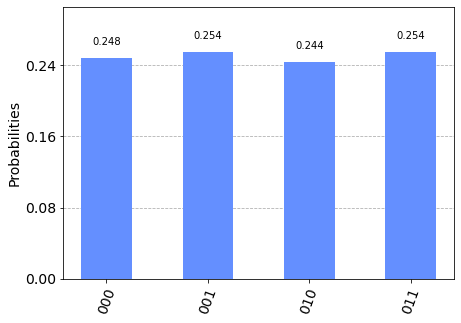

In [11]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim,shots=4096)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
plot_histogram(counts)

### 3.2 Example 2 : $\theta_{i}=\pi/2 \;, \; \forall i$ - all pixels at maximum intensity

The circuit is identical to the first defined, except for the value of $\theta$.

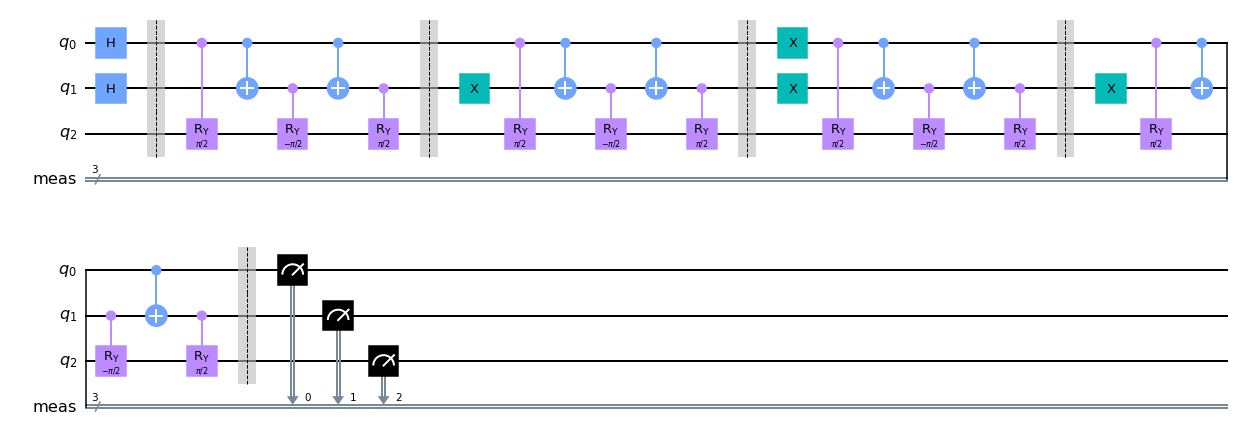

In [3]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw()

#### 3.2.1 Measurement and Image Retrieval
In this case we do expect to see the terms associated with the $\cos$ in the equation $\eqref{eq:22state}$ to vanish, and get 4 equiprobable states with a "1" prefix.

{'100': 999, '101': 1066, '110': 1050, '111': 981}


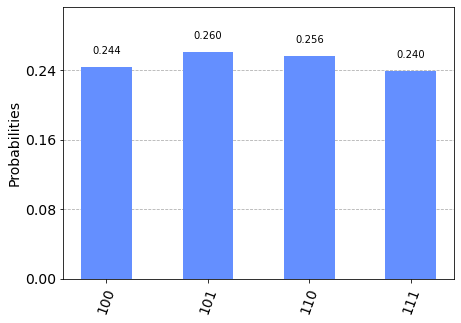

In [5]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc1, backend_sim,shots=4096)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)
print(counts)
plot_histogram(counts)

### 3.3 Example  3 : $\theta_{i}=\pi/4 \;, \; \forall i$ - all pixels at $50\%$ intensity

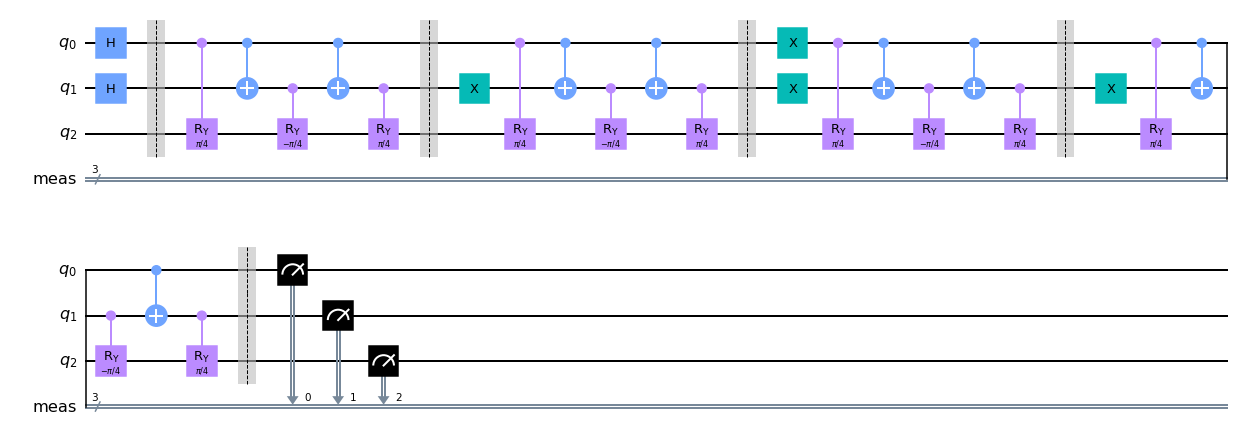

In [4]:
theta = pi/4  # all pixels white
qc2 = qk.QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()
#Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()
#Pixel 2

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)


qc2.barrier()

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw()

#### 3.3.1 Measurement and Image Retrieval
In this case we do expect to get all the 8 equiprobable states.

{'000': 582, '001': 511, '010': 518, '011': 493, '100': 463, '101': 515, '110': 494, '111': 520}


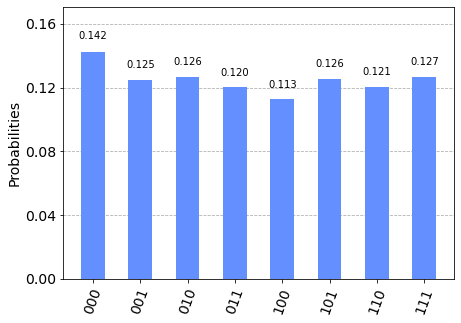

In [7]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc2, backend_sim,shots=4096)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc2)
print(counts)
plot_histogram(counts)

## 4. Circuit Analysis and Running on a Real Device
As the only difference between the circuits is the rotation angle $\theta$, we can check the depth, and number of gates needed for this class of circuits (i.e. 2×2 images).

### 4.1 Circuit Analysis

Let's use our circuit with $\theta_{i}=\pi/2 \;, \; \forall i$ as exemple (maximum intensity for all pixels).

In [5]:
print("Depth : ", qc1.depth())
print("Operations: ", qc1.count_ops())

Depth :  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


This does not look too complex but if we want to see how this circuit can be unrolled by the transpiler, it gets a bit more complicated.

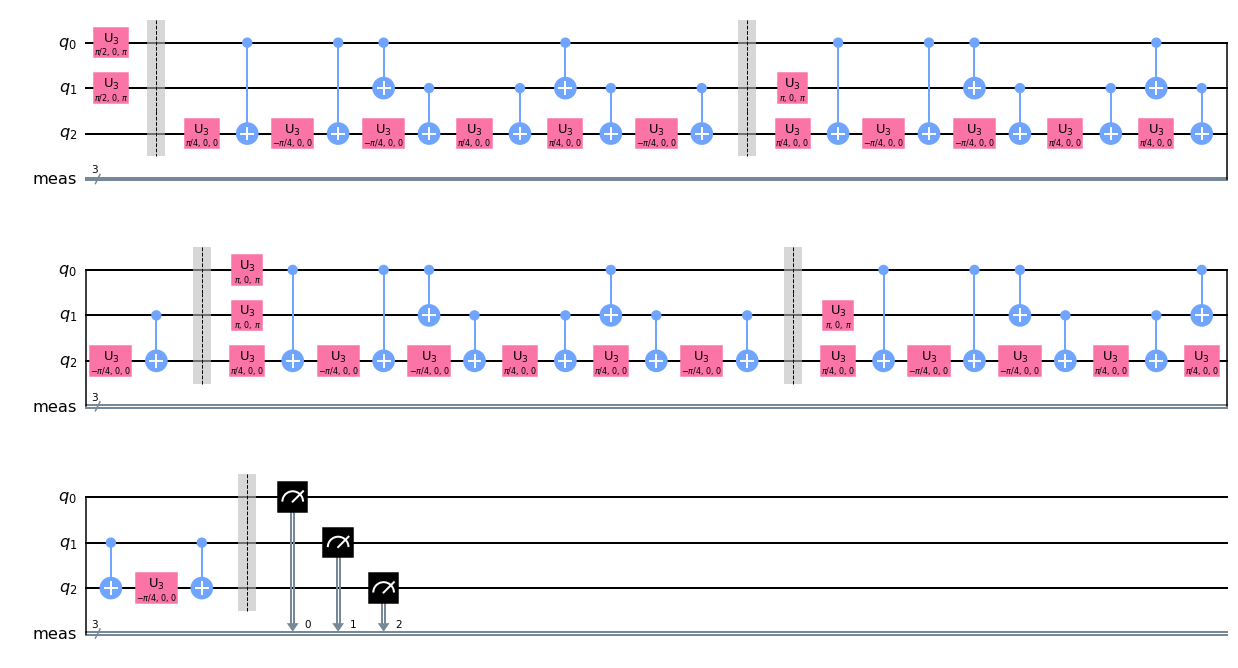

In [6]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw()

In [7]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


The depth for example doubled in size ! 

We can get closer to what would actually be run on a real device by feeding the transpiler with a device coupling map (for instance, Athens). We will also use optimization level 3.

In [8]:
from qiskit.test.mock import FakeAthens
device_backend = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.configuration().coupling_map
optimized_3 = transpile(qc1, backend=device_backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('cx', 55), ('u3', 30), ('u2', 20), ('barrier', 5), ('measure', 3)])
depth =  83


### 4.2 Run on a Real Device

We are now ready to run on a real device and will use the device Athens for this experience.

{'000': 325, '001': 319, '010': 372, '011': 292, '100': 641, '101': 889, '110': 560, '111': 698}


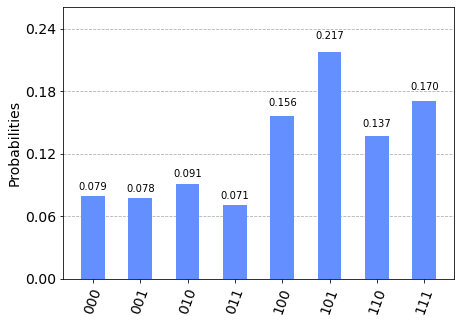

In [9]:
my_provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend_real = my_provider.get_backend('ibmq_athens')
job_real = execute(qc1, backend_real,shots=4096)
result_real = job_real.result()
counts = result_real.get_counts(qc1)
print(counts)
plot_histogram(counts)

As we can see the result is not really what we were expecting so we increase the number of shots to the maximum the device will accept (8192).

{'000': 590, '001': 435, '010': 676, '011': 530, '100': 1175, '101': 1499, '110': 1578, '111': 1709}


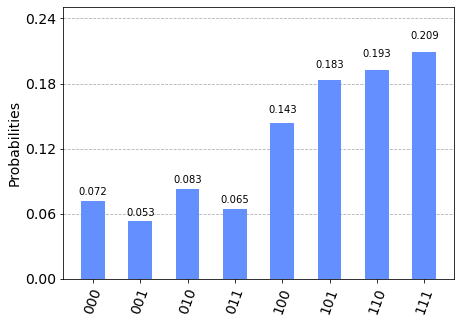

In [13]:
my_provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend_real = my_provider.get_backend('ibmq_athens')
job_real = execute(qc1, backend_real,shots=8192)
result_real = job_real.result()
counts = result_real.get_counts(qc1)
print(counts)
plot_histogram(counts)

{'100': 1030, '101': 1018, '110': 1000, '111': 1048}


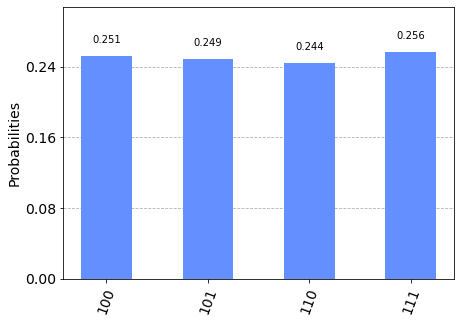

In [13]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc1, backend_sim,shots=4096)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)
print(counts)
plot_histogram(counts)

## 5. Compression

As the images we would like to encode are growing in size and given the depth of the circuits we will have to run, it is quite obvious that whatever we can do in order to reduce the complexity of the circuit (depth and number of $CNOT$ gates) will make a great difference.

Compression can be achieved by grouping pixels with the same intensity. What makes them distinct is the binary string used to encode the position, but they share the same angle for the associated controlled rotation. Let's consider for example the following image:

![](images/8x8_2col.png "8x8 2 colours image") 

The blue pixels are at positions are $\ket{0}, \ket{8}, \ket{16}, \ket{24}, \ket{32}, \ket{40}, \ket{48}$ and $\ket{56}$. 
\
Their respective binary representation and boolean expressions are:

\begin{array}{|c|c|c|}
\hline
position & binary \; string & boolean \; expression \\
\hline
\ket{0} &\ket{000000} & \overline{x_{5}}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{8} &\ket{001000} & \overline{x_{5}}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{16} &\ket{010000} & \overline{x_{5}}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{24} &\ket{011000} & \overline{x_{5}}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{32} &\ket{100000} & x_{5}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{40} &\ket{101000} & x_{5}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{48} &\ket{110000} & x_{5}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\ket{56} &\ket{111000} & x_{5}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}  \\
\hline
\end{array}

The boolean expression we would like to simplify/minimize is then :

$exp = \overline{x_{5}}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+\overline{x_{5}}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+\overline{x_{5}}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+\overline{x_{5}}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{5}x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}$

\begin{align*}
exp&=(\overline{x_{5}}+x_{5})(\overline{x_{4}}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}} +\overline{x_{4}}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{4}\overline{x_{3}}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}+x_{4}x_{3}\overline{x_{2}}\overline{x_{1}}\overline{x_{0}})\\
       &=\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}(\overline{x_{4}}\overline{x_{3}}+\overline{x_{4}}x_{3}+x_{4}\overline{x_{3}}+x_{4}x_{3})\\
       &=\overline{x_{2}}\overline{x_{1}}\overline{x_{0}}
\end{align*}

We can then not only group the pixels under one conditional rotation, but we also see that the conditions for the controlled gate also have been reduced, which will result in a reduction of single gates needed for implementation. 

# Exercises

The controlled rotations can be implemented via the generalized $C^{2n}\left( R_{y}(2\theta_{i}) \right) $, which can be broken down into standard rotations and $CNOT$ gates. Write down the cases for $n=2$ and $n=3$ and the associated decomposition.

The use cases we covered are basic greyscale and small images. How would you implement basic RGB images (i.e. 16 colours for example) ?

# Novel Enhanced Quantum Representation (NEQR) for Digital Images

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|}$

The **Novel Enhanced Quantum Representation** (NEQR) is another one of the earlier forms of quantum image represention. It's similar to its predecesor the Flexible Representation of Quantum Images (FRQI)[1] in that it uses a normalized superposition to store pixels in an image. The limitation of FRQI is that it uses one qubit to store the grayscale information of the pixel, which prevents performing any complex image transformations. NEQR was created to improve over FRQI by leveraging the basis state of a qubit sequence to store the image's grayscale value [5]. 

NEQR offers the following advantages over FRQI as demonstrated in [5]:
- Quadradic speedup of the time compexity to prepare the NEQR quantum image
- Optimal image compression ratio of up to 1.5×
- Accurate image retrieval after measurement, as opposed to probabilitic as FRQI
- Complex color and many other operations can be achieved

In this section we will represent a classical 2×2 grayscaled image in a quantum computer using the NEQR model.

## 1. The NEQR Process

The NEQR process to represent an image is composed of two parts; preparation and compression and are described as follows. 

### 1.1 How are images encoded today:

In order to represent an image on a quantum computer using the NEQR model, we'll first look at the various components required to do so and how they are related to each other. We'll begin with the color range of the image.

The color range of an image is represented by a bitstring as follows:
Binary Image: 1 bit representing 0=black, and 1=white

![](images/flower_binary.png)

Grayscale Image: 8 bits representing the various shades of gray intensity values between 0 (black) and 255 (white). 

![](images/flower_grey.png)

Color Image: 24 bits, are broken up into 3 groups of 8 bits, where each group of 8 bits represents the Red, Green, and Blue intensities of the pixel color. 

![](images/flower.jpg)


In our example we will represent the pixels by their position in the image. Since we will be representing a two-dimensional image, we will define the position of the image by its row and column, Y, X, respectively. 


**Note** In image processing the pixel positions are represented as they would on the X-Y plane, which is why the column numbers are represented by the value X, and the row numbers are represented by the value Y. 


### 1.2 Image Compression:

When the quantum representation of the image is completed, we will check the depth and size of the circuit created and provide some classical options to compress the generated NEQR circuit. 


Now, let's get started by encoding a 2×2 quantum image as follows.

## 2. Encoding a 2×2 Image

In this example we will encode a 2×2 grayscale image where each pixel value will contain the following values. In the table below we have the first column which represents the pixel position of the 2×2 image. The second column represents the intensity value at the specified pixel position. The third column is a description of the grayscale intensity (ex: 01100100 = 100).   


\begin{array}{|c|c|c|}
\hline
position & binary \; string & grayscale \; intensity \\
\hline
\ket{00} &\ket{00000000} & 0 - Black  \\
\hline
\ket{01} &\ket{01100100} & 100 - Dark shade \\
\hline
\ket{10} &\ket{11001000} & 200 - Light shade  \\
\hline
\ket{11} &\ket{11111111} & 255 - White \\
\hline
\end{array}


To encode these pixels we will need to define our quantum registers, the first register we will use to store the pixel position. Since this is a 2D image we will need two variables relates to the horizontal (column) and the other the vertical (row), Y and X respectively. 

The color value of each pixel is denoted as $\mathcal{f}(Y,X)$, where Y and X specify the pixel position in the image by row and column, respectively.

The range of the grayscale intensity for each pixel can vary, however since the most common grayscale range is generally from 0 - 255, the values is usually denoted as $2^{q}$, where for 256, we can confirm $q=8$. Where $q$  represents the number of bits needed for the binary sequence of colors: $C^{0}, C^{1},.. C^{q-2}, C^{q-1}$. 

This means that each pixel value can be represented as follows, where C is a binary representation of the grayscale intensity value:

$$
\mathcal{f}(Y,X) = C^{0}_{YX}, C^{1}_{YX},... C^{q-2}_{YX}, C^{q-1}_{YX} \in [0,1], \;\; f(Y,X)\in[0, 2^{q-1}]
\label{eq:color_rep} \tag{2.1}
$$
 
 
For example for a pixel at position (1,0) with a color intensity of 100 (01100100), it would be represented as follows: 

$$
\mathcal{f}(1,0) = \overline{C^{0}_{10}}, C^{1}_{10}, C^{2}_{10}, \overline{C^{3}_{10}}, \overline{C^{4}_{10}}, C^{5}_{10}, \overline{C^{6}_{10}}, \overline{C^{7}_{10}} = 01100100 = 100
$$



Therefore, the general expression to represent a quantum image for a $2^{n}$x $2^{n}$ image $|I\rangle$ is: 

$$
|I\rangle = \frac{1}{2^{n}}\sum_{Y=0}^{2^{2n-1}} \sum_{X=0}^{2^{2n-1}} | \mathcal{f}(Y,X)\rangle |Y X\rangle = \frac{1}{2^{n}}\sum_{Y=0}^{2^{2n-1}} \sum_{X=0}^{2^{2n-1}} \vert\otimes_{i=0}^{q-1}\rangle |C_{YX}^{i}\rangle |Y X\rangle
\label{eq:quantum_image_rep} \tag{2.2}
$$

Translating the equation above to our 2×2 example pixel values would result in the following: 

$$
\mathsf{\Omega}_{YX}|0\rangle^{\otimes q} = \frac{1}{\sqrt[]{2}}(|00000000\rangle |00\rangle + |01100100\rangle |01\rangle + |11001000\rangle |10\rangle + |11111111\rangle |11\rangle)
$$

Where $\mathsf{\Omega}_{YX}|0\rangle$ is the quantum operation which represents the value-setting of the pixel at position (Y, X). 


### 2.1 Create the Quantum Circuit for our Image

We'll first create our quantum circuit with the specific number of qubits needed to encode the image. To do this let's create two separate quantum circuits, one for the pixel values labeled **intensity**, and the other for the pixel positions labeled **idx**.

Our first quantum circuit will include the $2^n$ qubits used to represent the pixel value $f(Y,X)$, where in this case will have 8 qubits.

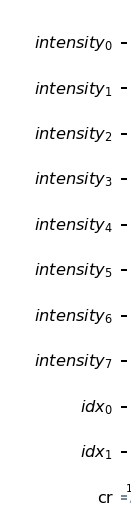

In [14]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

Next, we will add a Hadamard gate to the position qubits (idx) so we can take advantage of all positions in the 2×2 image. 
As an option we'll include Identity gates to the intensity qubits. 

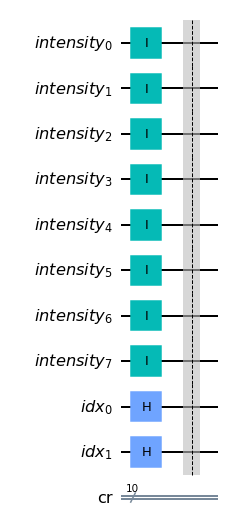

In [46]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

### 2.2 Representation of a Grayscale Image on a Quantum Circuit

Now that we have our quantum circuit created and initialized, let's start by first preparing our circuit by combining both the pixel position circuit together with its respective pixel intensity value. 
We'll include Identity gates and Barriers for ease of readability. 

Now let's encode our pixel values. Recall the values we set each pixel was as follows:


00 = 00000000 (Black)  

01 = 01100100 (Grayscale = 100)

10 = 11001000 (Grayscale = 200)

11 = 11111111 (White)

So we will start with the first pixel at position (0,0). 
Notice that we have all 0's therefore we can of course leave it blank, but let's use our Identity gates just for visualization purposes for pixel (0,0). 

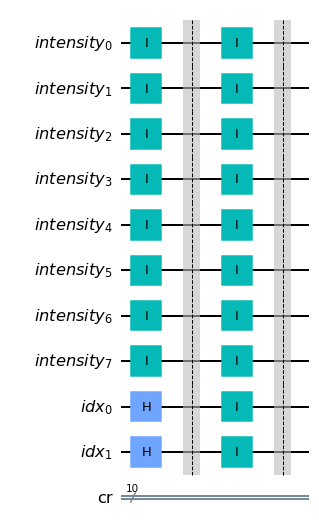

In [47]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

Next, we will encode the second pixel (0,1) whose value is (01010101). Here we will use a ControlNot gate with two-qubit controls (2-CNOT), where the Controls are triggered by the pixel position (Y,X), and the Targets rotate the $C^{i}_{YX}$ qubit which represents the pixel value.

**Note** here that because we want the CNOT gate to trigger when there the control is a combination of 0 and 1, that we wrap the qubit with X gates so it will trigger when the specified control is 0. 

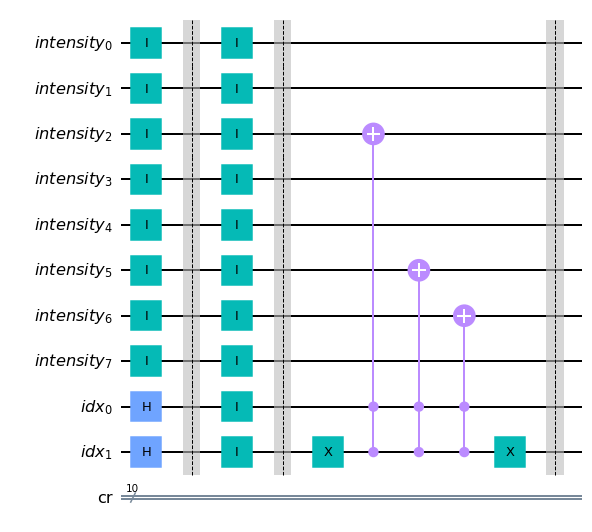

In [48]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw()

We'll now move on to encode the next pixel at position (1,0) with a value of (10101010).

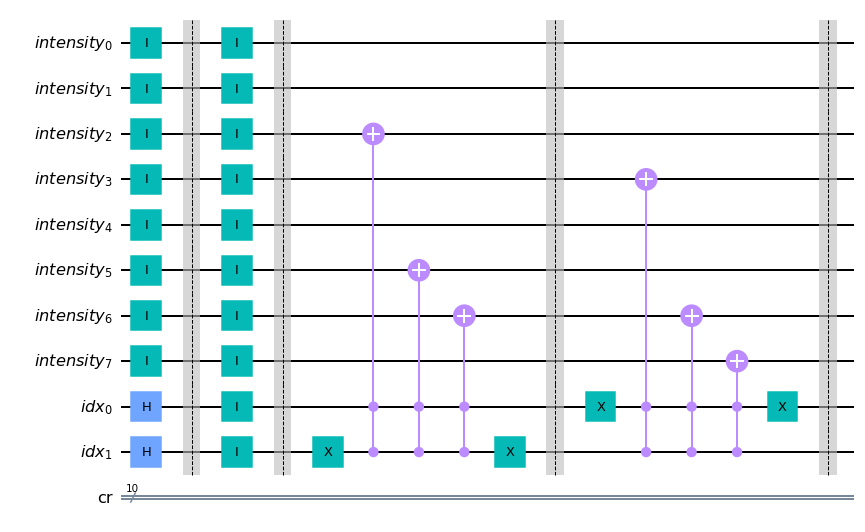

In [49]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

Finally, let's finish up encoding the last pixel position (1,1), with the value (11111111). 
This we simply do by adding Tofolli gates to all the pixel image values. 

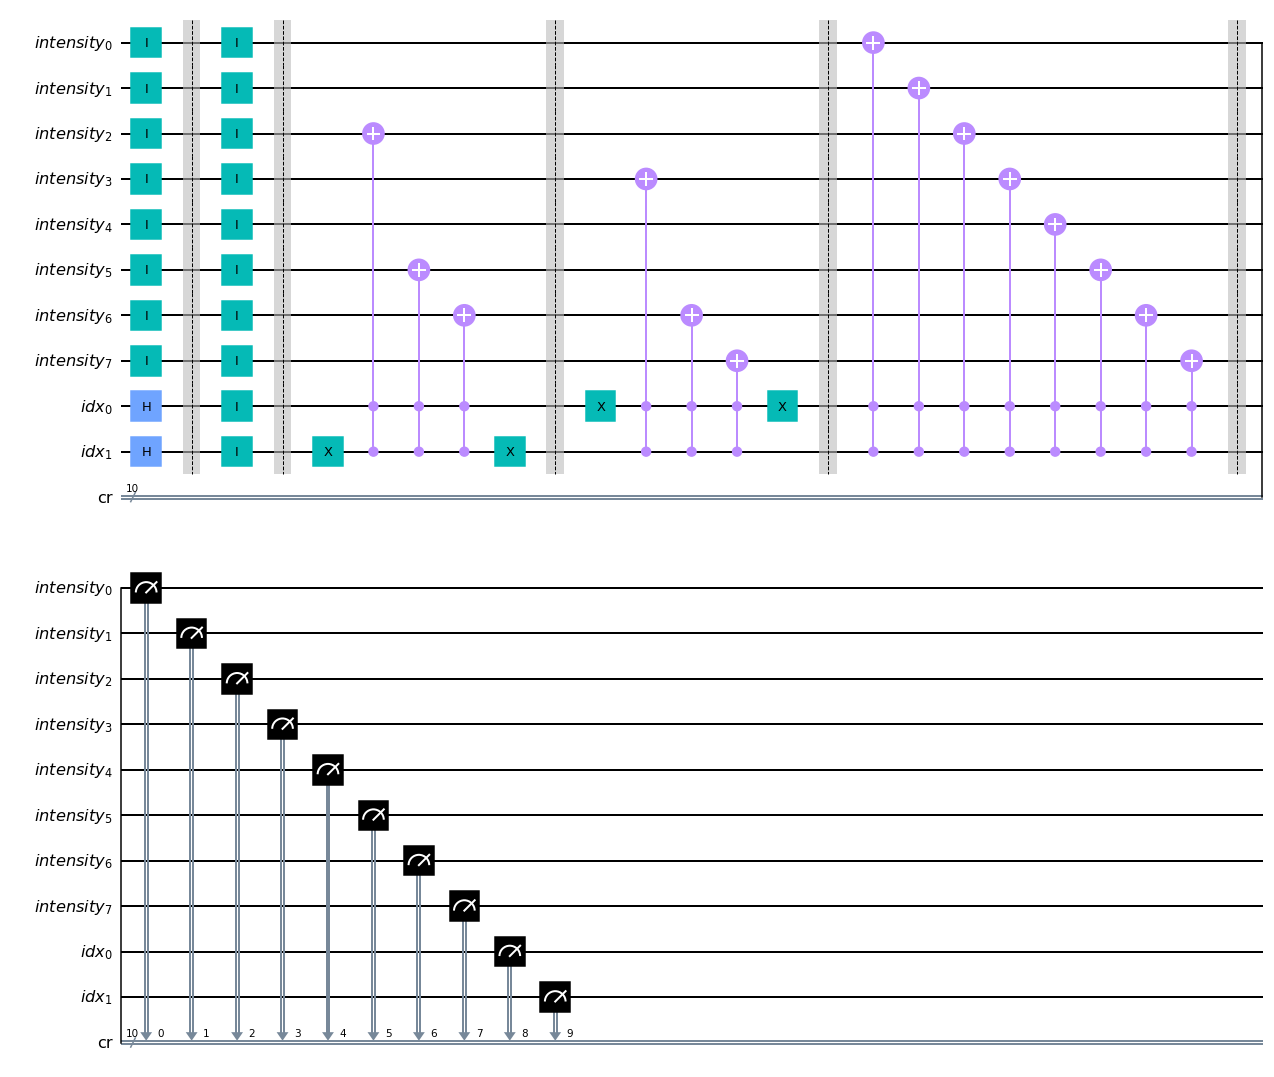

In [50]:
# Encode the third pixel whose value is (10101010):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

Congratulations! You have successfully encoded a 2×2 pixel grayscale image! 
Now, let's take a moment to review what we have done and notice a few things. 

### 2.3 Circuit Analysis

Now that we have encoded the image, let's analyze our circuit. 
First, we'll take a look at the total number of gates we are using for this circuit. We'll use the decompose function so we can strip the gates down to their basis gates.


We'll print out the depth, size, and operator counts: 

In [51]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  148
Circuit size:  244


OrderedDict([('cx', 84),
             ('t', 56),
             ('tdg', 42),
             ('h', 28),
             ('id', 18),
             ('measure', 10),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

#### Decomposition of circuit
A few things here may be surprise you. First and most surprising is the circuit depth, 168. This compared to the  22 (without counting the measurement operations) you see drawn in the final circuit above. 
The reason for this is due to the fact that the gates which we are using, particularly the multi control gates, require composing the basis gates in such a way to produce the multi-control gates. 

#### Optimization of the circuit
Lucky for us Qiskit has various optimizers which help ensure that the circuit is constructed in such a way that minimizes the number of gates necessary to compose the multi-control gates[REF: PassManager]. The optimizers also ensure that the selected qubits are the most optimal based on connectivity between qubits and minimal error rates[REF: Optimization-Levels]. Having these optimizers saves us a lot of time from having to figuring those out ourselves! 


### 2.4 Run on the QASM simulator

As with all near-term quantum computers, given the depth of the circuit we learned in the circuit analysis section and the number of 2-qubit gates necessary, it is expected to get extremely noisy and fairly useable data when running on a device with low Quantum Volume. We'll keep this in mind when running our circuit and try to minimize the noise from our results when possible.

Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'0000000000': 1956, '0101100100': 2079, '1011001000': 2043, '1111111111': 2114}


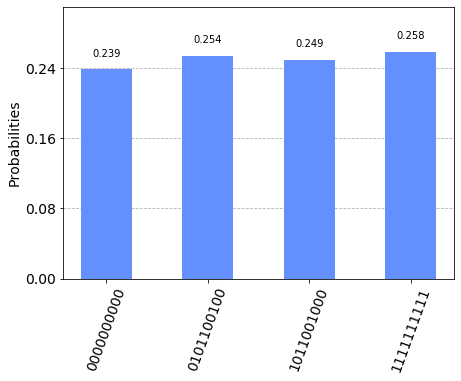

In [52]:
backend = Aer.get_backend('qasm_simulator')
job_neqr = execute(qc_image, backend,shots=8192)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts(qc_image)
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)

### Results Analysis
Observing the results above we can see the pixel positions are represented by the first two left-most bits (00,01,10,11) and the remaining bit values represent the 8-bit binary representation of the grayscale intensity values as listed in the encoded results as follows:   
 
Encoded: **00** = 00000000,
Encoded: **01** = 01100100,
Encoded: **10** = 11001000,
Encoded: **11** = 11111111
 

### 2.5 Quantum Image Circuit Compression


As you can see, with a depth of 127 and a circuit size of 264, this is a very large and very deep quantum circuit! 
Needless to say this is not very efficient. There are of course ways to compress the image in a way to decrease the depth of the circuit and have fewer operators. One way is to use a classic compression algorithm such as the Espresso Algorithm [8], which was developed in IBM by Brayton. The Espresso algorithm is used to compress the the control information of all the CNOT gates in the circuit to a minimum set of CNOT gates. 

How this would work is that each group of gates per pixel is divided into two groups. One which has the CNOT gates to represent the pixel values when set to 1, and the Identity gate which is set to 0. For example in the second pixel (0,1) we have 4 CNOT gates. Each group $\phi_{i}$ can be represented as follows:


$$\phi_{i} = (\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=0}^{2^{n}-1} I) \cup (\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=1}^{2^{n}-1} (2n - CNOT)_{YX}))\label{eq:expresso_separated} \tag{2.3}$$

Where $ \bigcup $ represents the union of all position and color value representations of the two groups as follows:

The left group represents the Identity gate group, indicating that if the value $C^{i}_{YX}=0$, then an Identity gate is to be used. Since the Identity gates have no effect to the circuit, then the left side can be ignored.

The right group represents the controlled-not gate, indicating that if $C^{i}_{YX}=1$, then a CNOT gate is to be used.

The Espresso algorithm is then used to minimize the set of all the controlled-not gates, as illustrated in the equation below.

$$\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=1}^{2^{n}-1} YX \xrightarrow[]{\text{Espresso}} \bigcup_{K_i}K_i \label{eq:compressed_circuit} \tag{2.4}$$ 

Where the $\bigcup_{K_i}K_i$ represents the minimum number of controlled-not gates.

# Conclusion

In this section we covered the Novel Enhanced Quantum Representation algorithm and how you can use controlled-not gates to present images on quantum system. Also covered is a form to reduce the circuit depth of the quantum image representation by using the Espresso algorithm, which is used to minimize the number of controlled-gates to use in a quantum circuit and run on a quantum computer [7].


The potential advantages of representing images on a quantum system include ability to speed up any processing of the image such as quantum parallelism to search through an image [9], feature extraction [10], image segmentation [11]. There are various quantum machine learning algorithms that are integrated with many image processing operations such as; image classification [12], image recognition [13], and a variety of other image processing techniques [6]. Combining quantum image processing and quantum machine learning to potentially solve problems which may be challenging to classical systems, particularly those which require processing large volumes of images in various domains such as medical image processing, geographic information system imagery, and image restoration.


# Exercises

1. Given the following pixel values of a 2×2 image [101], [011], [111], [000], write a python function that creates a Quantum Circuit that represents that image. (Hint: You'll need to create a 5 qubit circuit.)


2. With the circuit you created above, transform the pixel values to their complement.


# References 

[1] Le, P.Q., Dong, F. & Hirota, K. A flexible representation of quantum images for polynomial preparation, image compression, and processing operations. Quantum Inf Process 10, 63–84 (2011). https://doi.org/10.1007/s11128-010-0177-y 

[2] Le, Phuc Quang, Fayang Dong and Kaoru Hirota. “Flexible Representation of Quantum Images and Its Computational Complexity Analysis.” (2009). https://doi.org/10.14864/fss.25.0.185.0

[3] Y. Zhang, K. Lu, and Y. Gao, Qsobel: A Novel Quantum Image Edge Extraction Algorithm, Sci. China Inf. Sci. 58, 1-13 (2015). http://engine.scichina.com/doi/pdf/62784e3238b8457bb36f42efc70b37d2

[4] Xi-Wei Yao, Hengyan Wang, Zeyang Liao, Ming-Cheng Chen, Jian Pan, Jun Li, Kechao Zhang, Xingcheng Lin, Zhehui Wang, Zhihuang Luo, Wenqiang Zheng, Jianzhong Li, Meisheng Zhao, Xinhua Peng, Dieter Suter, Quantum Image Processing and Its Application to Edge Detection: Theory and Experiment. https://arxiv.org/abs/1801.01465


[5] Zhang, Y., Lu, K., Gao, Y. et al. _NEQR: a novel enhanced quantum representation of digital images._ Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[6] Cai,Yongquan et al. _A Survey on Quantum Image Processing._ Chinese Journal of Electronics(2018), 27 (4):718_ http://dx.doi.org/10.1049/cje.2018.02.012

[7] “Qiskit: An open-source framework for quantum computing,”  (2019). https://qiskit.org

[8] Brayton, R.K. Sangiovanni-Vicentelli, A. McMullen, C. Hacktel, G.: _Log Minimization Algorithms VLSI Synch_. Kluwer Academic Publishers, DOrdrecht (1984) 

[9] L.K. Grover, “A fast quantum mechanical algorithm for database search”, In Proceedings of the 28th Annual ACM Symposium on the Theory of Computing, pp. 212–219, (1996)

[10] Y. Zhang, K. Lu, K. Xu, Y. Gao, and R. Wilson. 2015. “Local feature point extraction for quantum images”, Quantum Information Processing vol. 14, no. 5, pp. 1573–1588, (2015)

[11] Y. Ruan, H. Chen, J. Tan, and X. Li. “Quantum computation for large-scale image classification”, Quantum Information Processing, vol. 15, pp. 4049–4069, July (2016)

[12] Dang, Y., Jiang, N., Hu, H., Ji, Z., & Zhang, W. (2018). Image Classification Based on Quantum KNN Algorithm. ArXiv, abs/1805.06260.

[13] Kerenidis, I., Landman, J. and Prakash, A., 2019. Quantum algorithms for deep convolutional neural networks. arXiv preprint arXiv:1911.01117



In [14]:
import qiskit.tools.jupyter
%qiskit_version_table